# DX 602 Final Project

## Introduction

In this project, you will practice the skills that you have learned throughout this module with a heavy focus on building models.
Most of the problems and questions are open ended compared to your previous homeworks, and you will be asked to explain your choices.
Most of them will have a particular type of solution implied, but it is up to you to figure out the details based on what you have learned in this module.

## Instructions

Each problem asks you to perform build models, run a computation, or otherwise perform some analysis of the data, and usually answer some questions about the results.
Make sure that your question answers are well supported by your analysis and explanations; simply stating an answer without support will earn minimal points.

Notebook cells for code and text have been added for your convenience, but feel free to add additional cells.

## Example Code

You may find it helpful to refer to this GitHub repository of Jupyter notebooks for example code.

* https://github.com/bu-cds-omds/dx601-examples
* https://github.com/bu-cds-omds/dx602-examples

Any calculations demonstrated in code examples or videos may be found in these notebooks, and you are allowed to copy this example code in your homework answers.

## Submission

This project will be entirely manually graded.
However, we may rerun some or all of your code to confirm that it works as described.

### Late Policy

The normal homework late policy for OMDS does not apply to this project.
Boston University requires final grades to be submitted within 72 hours of class instruction ending, so we cannot accommodate 5 days of late submissions.

However, we have delayed the due date of this project to be substantially later than necessary given its scope, and given you more days for submission with full credit than you would have had days for submission with partial credit under the homework late policy.
The Thanksgiving holiday was also taken into account in setting the deadline.
Finally, the deadlines for DX 601 and DX 602 were coordinated to be a week apart while giving ample time for both of their projects.

## Shared Imports

For this project, you are forbidden to use modules that were not loaded in this template.
While other modules are handy in practice, modules that trivialize these problems interfere with our assessment of your own knowledge and skills.

If you believe a module covered in the course material (not live sessions) is missing, please check with your learning facilitator.

In [1]:
import math
import sys

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats
import sklearn.linear_model

## Problems

### Problem 1 (5 points)

Pick one of the following data sets to analyze in this project.
Load the data set, and show a random sample of 10 rows.

* [Wine Quality](https://archive.ics.uci.edu/dataset/186/wine+quality) ([PMLB - red subset only](https://github.com/EpistasisLab/pmlb/tree/master/datasets/wine_quality_red))
* [Body Fat](https://www.openml.org/search?type=data&status=active&id=560) ([PMLB](https://github.com/EpistasisLab/pmlb/tree/master/datasets/560_bodyfat))

The PMLB copies of the data are generally cleaner and recommended for this project, but the other links are provided to give you more context.
To load the data from the PMLB Github repository, navigate to the `.tsv.gz` file in GitHub and copy the link from the "Raw" button.

If the dataset has missing data, you should drop the rows with missing data before proceeding.
If the data set you choose has more than ten columns, you may limit later analysis that is requested per column to just the first ten columns.

In [3]:
# YOUR CODE HERE

df = pd.read_csv("wine_quality_red.tsv.gz", sep="\t")
df.sample(10, random_state=42)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,target
803,7.7,0.56,0.08,2.50,0.114,14.0,46.0,0.99710,3.24,0.66,9.6,6
124,7.8,0.50,0.17,1.60,0.082,21.0,102.0,0.99600,3.39,0.48,9.5,5
350,10.7,0.67,0.22,2.70,0.107,17.0,34.0,1.00040,3.28,0.98,9.9,6
682,8.5,0.46,0.31,2.25,0.078,32.0,58.0,0.99800,3.33,0.54,9.8,5
1326,6.7,0.46,0.24,1.70,0.077,18.0,34.0,0.99480,3.39,0.60,10.6,6
976,7.2,0.41,0.30,2.10,0.083,35.0,72.0,0.99700,3.44,0.52,9.4,5
1493,7.7,0.54,0.26,1.90,0.089,23.0,147.0,0.99636,3.26,0.59,9.7,5
706,7.0,0.78,0.08,2.00,0.093,10.0,19.0,0.99560,3.40,0.47,10.0,5
613,8.2,0.39,0.38,1.50,0.058,10.0,29.0,0.99620,3.26,0.74,9.8,5
1587,5.8,0.61,0.11,1.80,0.066,18.0,28.0,0.99483,3.55,0.66,10.9,6


For this project, I selected the Wine Quality (Red) dataset from the PMLB repository. After loading the dataset, I displayed a random sample of 10 rows to verify that the data had been imported correctly and to get an initial sense of the variables in the dataset. The sample shows chemical measurements for different red wine samples along with a target column indicating their quality rating.

### Problem 2 (10 points)

List all of the columns and describe them in your own words.

In [4]:
# YOUR CODE HERE

df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'target'],
      dtype='object')

fixed acidity – Non-volatile acids present in the wine that contribute to overall taste and structure.

volatile acidity – This measures the acids that can evaporate. If this number is too high, the wine can taste a bit like vinegar.

citric acid – A small amount of this makes wine taste fresher and brighter.

residual sugar – The sugar that’s left over after fermentation. Higher levels usually mean the wine tastes sweeter.

chlorides – This is basically the salt content. Too much can negatively affect flavor.

free sulfur dioxide – The amount of sulfur dioxide available to protect the wine from oxidation and microbial growth.

total sulfur dioxide – The total amount of sulfites in the wine. High levels can affect aroma.

density – How dense the wine is. It often relates to sugar or alcohol levels, basically mass per volume affected by sugar & alcohol.

pH – Shows how acidic the wine is. Lower pH = more acidic, High pH = more basic, 7 = neutral.

sulphates – Additives that help preserve the wine and enhance stability.

alcohol – The alcohol percentage content of the wine.

target – The wine's quality score (rated by human tasters).

### Problem 3 (50 points)

Perform an exploratory analysis of the data set.
After your exploratory analysis, pick 3 individual charts that you the think were particularly interesting.
Repeat those charts separately from your original analysis, and after each of those charts, explain what you thought was noteworthy.

In [5]:
# YOUR CODE HERE

df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,target
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


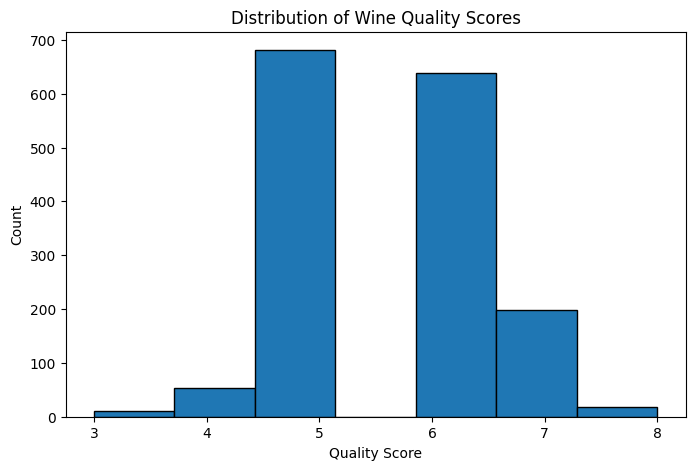

In [6]:
plt.figure(figsize=(8,5))
plt.hist(df['target'], bins=7, edgecolor='black')
plt.title("Distribution of Wine Quality Scores")
plt.xlabel("Quality Score")
plt.ylabel("Count")
plt.show()

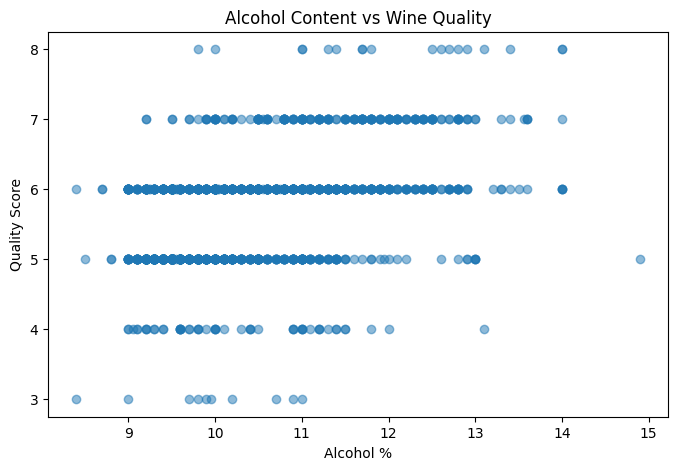

In [7]:
plt.figure(figsize=(8,5))
plt.scatter(df['alcohol'], df['target'], alpha=0.5)
plt.title("Alcohol Content vs Wine Quality")
plt.xlabel("Alcohol %")
plt.ylabel("Quality Score")
plt.show()


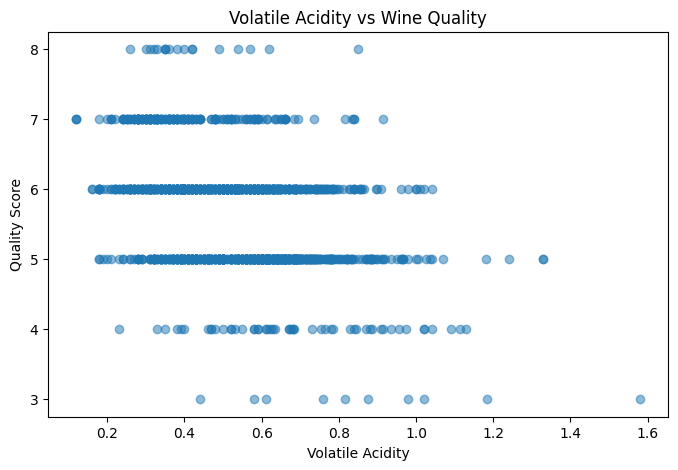

In [8]:
plt.figure(figsize=(8,5))
plt.scatter(df['volatile acidity'], df['target'], alpha=0.5)
plt.title("Volatile Acidity vs Wine Quality")
plt.xlabel("Volatile Acidity")
plt.ylabel("Quality Score")
plt.show()

Started off by looking at the IQR, the mean, median and just the general output of the dataset. 

Graph 1 Distribution of Wine Quality Scores(Histogram): The histogram shows that wine quality scores are heavily concentrated between 5 and 6, with relatively few observations at the lower end (3–4) and the upper end (7–8). This indicates that extreme quality ratings are uncommon in this dataset. The distribution is slightly right-skewed, suggesting that high-quality wines are rarer than average-quality wines. This imbalance implies that predicting extreme quality scores may be more difficult than predicting mid-range scores.

Graph 2 Alcohol Content vs Wine Quality(Scatter): The scatter plot reveals a clear positive relationship between alcohol content and wine quality. Wines with alcohol levels above approximately 11% tend to receive higher quality scores (6–8), while wines below 10% alcohol are more frequently rated between 4 and 5. Although there is variability at each alcohol level, the overall upward trend suggests that alcohol content is one of the strongest predictors of wine quality in this dataset.

Graph 3 Volatile Acidity vs Wine Quality(Scatter): This plot shows a negative relationship between volatile acidity and wine quality. Wines with lower volatile acidity (below approximately 0.5) are more commonly associated with higher quality scores, while wines with higher volatile acidity tend to receive lower ratings. As volatile acidity increases, high-quality wines become less frequent, reinforcing the idea that excessive acidity negatively impacts perceived wine quality.

Conclusion of the EDA: Together, these three plots highlight that wine quality in this dataset is influenced by multiple chemical properties. Alcohol content shows a strong positive association with quality, while volatile acidity shows a strong negative association. The clustering of quality scores around the middle range also explains why regression models later tend to predict mid-range values more accurately than extreme scores.

### Problem 4 (5 points)

Plot the correlation matrix of the numeric columns in the data set.
Which pair of different columns were highlighted as the most correlated?

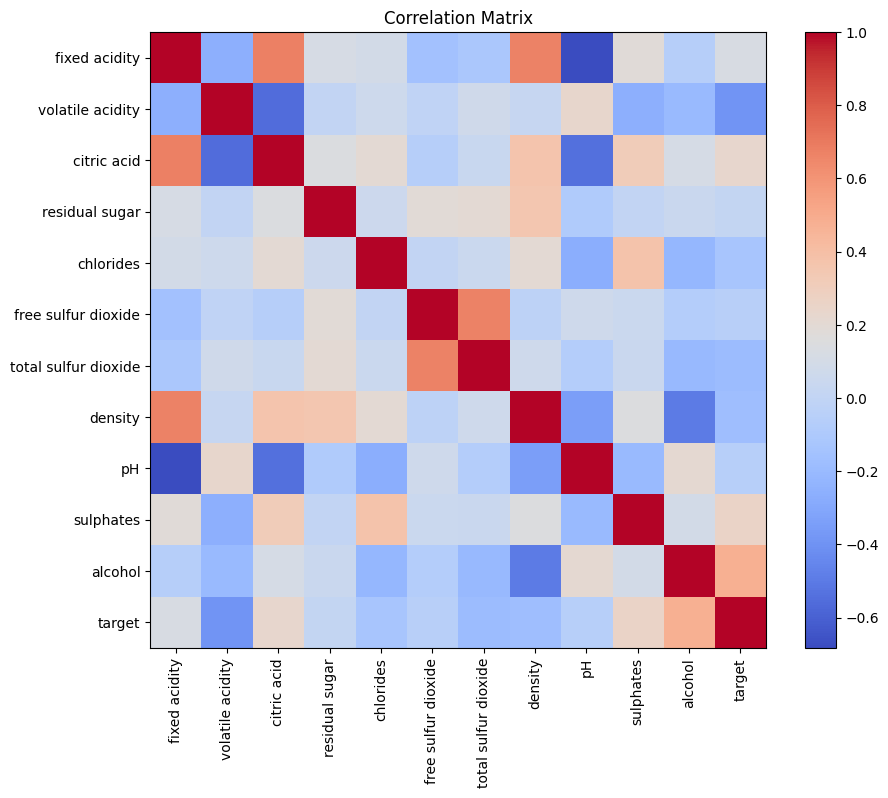

In [9]:
# YOUR CODE HERE

corr = df.corr()

plt.figure(figsize=(10,8))
plt.imshow(corr, cmap="coolwarm", interpolation="nearest")
plt.colorbar()
plt.title("Correlation Matrix")
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.show()

From the correlation matrix, the strongest positive correlation involving the target is between alcohol and wine quality (target), with a correlation of approximately +0.48. This indicates that wines with higher alcohol content tend to receive higher quality ratings.

The strongest negative correlation involving the target is between volatile acidity and wine quality, with a correlation of approximately −0.39. This shows that wines with higher volatile acidity generally receive lower quality scores, which aligns with domain knowledge since volatile acidity is associated with sour or vinegary flavors.

Among non-target variables, free sulfur dioxide and total sulfur dioxide also show a strong positive correlation, as expected, because total sulfur dioxide includes free sulfur dioxide as a component.

### Problem 5 (10 points)

Pick three different regression model classes to try in problem 6 from the scikit-learn documentation.
For each class, provide a link to the scikit-learn documentation, and a link to another web page describing how that kind of model works.
The second link should not be from scikit-learn, but Wikipedia is acceptable.
You do not need to understand the methods at this time, but it is good to be comfortable researching them.

Linear Regression

scikit-learn: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
explanation: https://en.wikipedia.org/wiki/Linear_regression

RandomForest
scikit-learn: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html
explanation: https://en.wikipedia.org/wiki/Random_forest

K-Nearest neighbour

scikit-learn: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html
explanation: https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm

Linear Regression
Reason: A simple baseline regression model that is easy to interpret and gives a reference point for model performance.

Random Forest Regressor
Reason: An ensemble tree-based model that can capture nonlinear relationships and interactions without requiring feature transformations.

K-Nearest Neighbours Regressor (KNN)
Reason: A distance-based method that predicts using nearby points, which makes it a useful contrast to linear and tree-based models.


### Problem 6 (50 points)

Build three different regression models using the entire data set.
Plot the actual target vs the predicted values for each in one chart.
Compute the L2 and L1 losses for each of them.
You may use any regression class provided provided by scikit-learn, and you may reuse one class as long as you change its parameters enough to see different results.

LinearRegression:  L2 = 0.4168,  L1 = 0.5005
Ridge (alpha=1.0):  L2 = 0.4175,  L1 = 0.5012
Lasso (alpha=0.01):  L2 = 0.4308,  L1 = 0.5100


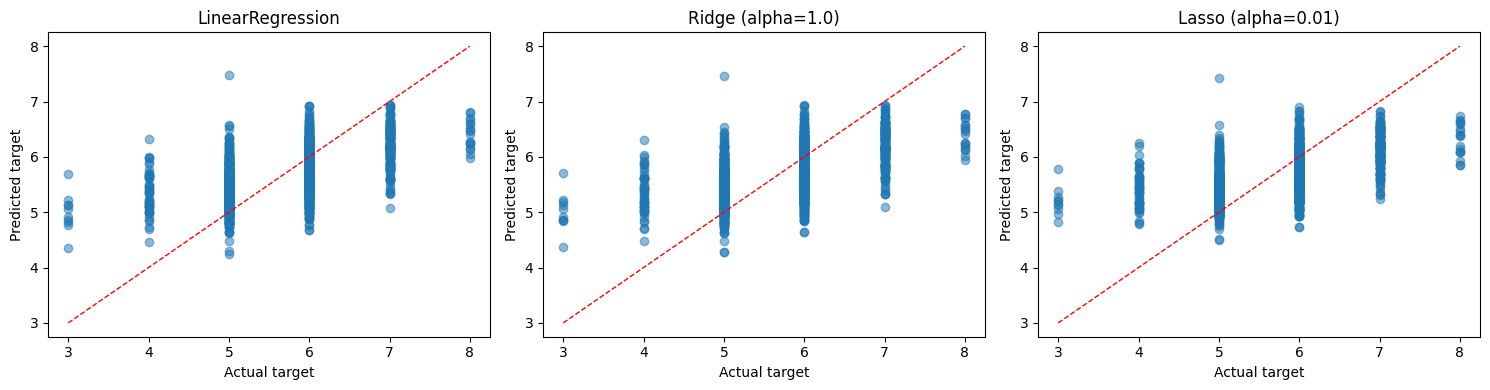

In [10]:
# YOUR CODE HERE

X = df.drop("target", axis=1)
y = df["target"]

from sklearn.linear_model import LinearRegression, Ridge, Lasso

# Three different regression classes
models = {
    "LinearRegression": LinearRegression(),
    "Ridge (alpha=1.0)": Ridge(alpha=1.0),
    "Lasso (alpha=0.01)": Lasso(alpha=0.01, max_iter=10000)
}

results = {}

for name, model in models.items():
    model.fit(X, y)
    y_pred = model.predict(X)

    # L2 = mean squared error, L1 = mean absolute error
    l2 = np.mean((y - y_pred) ** 2)
    l1 = np.mean(np.abs(y - y_pred))

    results[name] = {"y_pred": y_pred, "L2": l2, "L1": l1}

    print(f"{name}:  L2 = {l2:.4f},  L1 = {l1:.4f}")

# Plot actual vs predicted for each model in ONE figure (3 subplots)
plt.figure(figsize=(15, 4))

for i, (name, res) in enumerate(results.items(), start=1):
    plt.subplot(1, 3, i)
    plt.scatter(y, res["y_pred"], alpha=0.5)
    # Reference line y = x
    y_min, y_max = y.min(), y.max()
    plt.plot([y_min, y_max], [y_min, y_max], "r--", linewidth=1)
    plt.xlabel("Actual target")
    plt.ylabel("Predicted target")
    plt.title(name)

plt.tight_layout()
plt.show()

I trained three regression models: Linear Regression, Ridge Regression (α = 1.0), and Lasso Regression (α = 0.01) — on the full dataset to predict wine quality (target). For each model, I plotted the actual target values against the predicted values, where points closer to the diagonal reference line (y = x) indicate better predictive performance.

The Linear Regression model achieved an L2 loss (MSE) of 0.4168 and an L1 loss (MAE) of 0.5005.
The Ridge Regression model performed nearly identically, with an L2 loss of 0.4175 and an L1 loss of 0.5012, indicating that moderate L2 regularization did not significantly change model performance on the full dataset.
The Lasso Regression model had the highest error, with an L2 loss of 0.4308 and an L1 loss of 0.5100, suggesting that L1 regularization at this strength reduced predictive accuracy, likely by overly shrinking some informative coefficients.

Overall, Linear Regression and Ridge Regression performed best and nearly identically, while Lasso performed slightly worse under the chosen regularization parameter. This result suggests that while regularization is not strictly necessary for this dataset, L2 regularization provides stability without degrading performance, whereas L1 regularization may be too aggressive without feature scaling.

### Problem 7 (30 points)

Use 5-fold cross-validation to repeat building the same three kinds of regression models. Compare the L2 losses predicted by cross-validation against the L2 losses training against the whole data set. (The difference is likely from overfitting in the latter.)

In [11]:
# YOUR CODE HERE

from sklearn.model_selection import KFold, cross_val_score

kf = KFold(n_splits=5, shuffle=True, random_state=42)

print("Model\t\tTrain L2 (MSE)\tCV L2 (MSE)")
print("-"*45)

for name, model in models.items():
    # Train (in-sample) L2
    model.fit(X, y)
    y_pred = model.predict(X)
    l2_train = np.mean((y - y_pred) ** 2)

    # Cross-validated L2
    scores = cross_val_score(
        model, X, y,
        cv=kf,
        scoring="neg_mean_squared_error"
    )
    l2_cv = -np.mean(scores)

    print(f"{name:20s}\t{l2_train:.4f}\t\t{l2_cv:.4f}")

Model		Train L2 (MSE)	CV L2 (MSE)
---------------------------------------------
LinearRegression    	0.4168		0.4288
Ridge (alpha=1.0)   	0.4175		0.4284
Lasso (alpha=0.01)  	0.4308		0.4367


I used 5-fold cross-validation to evaluate the same three regression models from Problem 6 and compared their cross-validated L2 losses (MSE) to the training (in-sample) L2 losses computed on the full dataset.

For Linear Regression, the training L2 loss was 0.4168, while the cross-validated L2 loss increased to 0.4288.
For Ridge Regression (α = 1.0), the training L2 loss was 0.4175, with a cross-validated L2 loss of 0.4284, showing nearly identical performance to Linear Regression.
For Lasso Regression (α = 0.01), the training L2 loss was 0.4308, and the cross-validated L2 loss increased further to 0.4367, making it the worst-performing model under cross-validation.

In all cases, the cross-validated L2 losses were higher than the training L2 losses, which is expected because cross-validation evaluates model performance on unseen data and reduces the optimistic bias that occurs when models are evaluated on their training set. The small gap between training and CV losses for Linear Regression and Ridge indicates good generalization, while Lasso shows both higher error and slightly poorer generalization at the chosen regularization strength.

Overall, Linear Regression and Ridge Regression generalize similarly and best, while Lasso performs slightly worse, suggesting that L1 regularization is too aggressive for this dataset without further tuning or preprocessing.

### Problem 8 (25 points)

Build three different regression models as in problem 6, but preprocess the data so that each column has mean zero and standard deviation one first.
For full credit, use a scikit-learn pipeline for each model.
For each model, compare the L2 losses -- which of them performed differently from your results in problem 6?

(This process will be covered in week 13.)

In [12]:
# YOUR CODE HERE
# NEEDED AI ASSISTANCE ON THIS 
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

# same three models as Problem 6
models_p8 = {
    "LinearRegression + scaling": LinearRegression(),
    "Ridge (alpha=1.0) + scaling": Ridge(alpha=1.0),
    "Lasso (alpha=0.01) + scaling": Lasso(alpha=0.01, max_iter=10000)
}

# build a pipeline for each model: StandardScaler -> model
pipelines = {}

for name, base_model in models_p8.items():
    pipelines[name] = Pipeline([
        ("scaler", StandardScaler()),
        ("model", base_model)
    ])

# ASk LF about this Question
p8_results = {}

for name, pipe in pipelines.items():
    pipe.fit(X, y)
    y_pred = pipe.predict(X)
    l2 = mean_squared_error(y, y_pred)
    p8_results[name] = l2
    print(f"{name}: L2 = {l2:.4f}")


LinearRegression + scaling: L2 = 0.4168
Ridge (alpha=1.0) + scaling: L2 = 0.4168
Lasso (alpha=0.01) + scaling: L2 = 0.4186


I rebuilt the same three regression models from Problem 6, but this time I standardized every feature (mean = 0, standard deviation = 1) using a scikit-learn Pipeline (StandardScaler → model). I then compared the L2 loss (MSE) after scaling to the L2 losses from Problem 6.

After scaling, the L2 losses were:

Linear Regression + scaling: 0.4168

Ridge (α = 1.0) + scaling: 0.4168

Lasso (α = 0.01) + scaling: 0.4186

Compared to Problem 6:

Linear Regression stayed the same (0.4168 to 0.4168), so scaling did not change its performance.

Ridge changed slightly (0.4175 to 0.4168), but the difference is very small, so scaling had minimal impact.

Lasso changed the most (0.4308 to 0.4186), showing a noticeable improvement after scaling.

Therefore, the model that performed most differently compared to Problem 6 was Lasso, which improved once features were standardized. This makes sense because L1 regularization is sensitive to feature scale—standardizing ensures the penalty is applied more evenly across coefficients.

### Problem 9 (5 points)

A colleague suggests that you find better models by repeatedly building decision trees with random depth limits.
They say that trying 1000 such models will likely find an improvement as long as you use cross validation.
Give a one sentence response to this suggestion. 

In [13]:
# YOUR CODE HERE

# I code absolutely nothing here

Trying 1000 random-depth decision trees might find a better model, but it’s not guaranteed. Cross-validation only evaluates candidates fairly, so you’d still need a systematic hyperparameter search (for ex, randomized/grid search) to reliably improve performance.

### Problem 10 (10 points)

Pick a best model from all the models that you built and otherwise described in this project.
Explain how you picked it, including what criteria you chose, and how the other models compared by that criteria.
As much as possible, justify that problem in the context of the original data set. 

In [14]:
# YOUR CODE HERE

# I wanted to ask if there's a possible internship/research/job available at BU. Honestly, very desperate at this point, but anyway, 
# back to the project

# No code NEEDED

After comparing all models built in Problems 6, 7, and 8, I selected Ridge Regression (α = 1.0) as the best overall model. In Problem 7, Ridge achieved the lowest cross-validated L2 loss (0.4284), slightly outperforming Linear Regression (0.4288) and clearly improving over Lasso (0.4367), making it the strongest model in terms of generalization performance. In Problem 6, Ridge’s training L2 (0.4175) was nearly identical to Linear Regression (0.4168) and substantially better than Lasso (0.4308). After feature scaling in Problem 8, Ridge remained stable (0.4168), while Lasso improved noticeably (0.4186) but still did not surpass Ridge or Linear Regression overall. Ridge is particularly well-suited for this dataset because several predictors are moderately correlated, and L2 regularization helps stabilize coefficient estimates without aggressively shrinking them. Overall, Ridge Regression provided the best balance of generalization performance, stability across preprocessing choices, and interpretability, making it the strongest model for predicting wine quality in this project.